<a href="https://colab.research.google.com/github/waripex/ADA-informes/blob/main/Informe_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema de Ordenamiento

Este es un problema clásico el cual ha sido estudiado desde hace más de 50 años. Por otro lado, la gran cantidad de aplicaciones que tienen los problemas de este tipo generan un interés tanto teórico como práctico. De igual forma, producto de los distintos escenarios en los que se ha buscado aplicar es que han surgido variaciones de este problema. 


En general, el problema de ordenamiento tiene la siguiente estructura:
 

  **Entrada:** secuencia de *n* números  $[a_1, a_2, ... ,a_n]$

  **Salida:** Permutación ordenada de la secuencia de entrada: $[a'_1, a'_2, ... ,a'_n]$, de forma que $a'_1 \leq a'_2 \leq ... \leq a'_n$


Como ya se mencionó, a raíz del árduo estudio dedicado a este problema es que surgieron variantes del mismo. En esta oportunidad, se hará un análisis del MergeSort.

# Mergesort

## 1 Descripción

El algoritmo MergeSort pertence al diseño de tipo "*divide y venceras*" y al igual que el algoritmo visto antes, recibe una secuencia de numeros como entrada y retorna la misma secuencia ordenada de menor a mayor.

**Entrada:** Secuencia de $n$ numeros $[a_1,a_2,...,a_n]$.

**Salida:** Permutación ordenada de la secuencia de entrada: $[a_1',a_2',...,a_n']$, de forma que $a_1'\leq a_2' \leq... \leq a_n'$.



>  ### *Divide y venceras*
  Este paradigma consiste en:


>*   **Dividir** el problema en sub-problemas similares al inicial, pero mas chicos.
*   **Resolver** los sub-porblemas recursivamente, es decir, aplicando el mismo algoritmo a cada sub-arreglo.
*   **Combinar** las soluciones de todos los sub-problemas para obtener la solucion del problema original.


La resolucion del MergeSort es bastante simple. Considerando como entrada una secuencia de $n$ numeros:


1.   Primeramente, se divide la secuencia original en 2 partes, donde cada sub-secuencia contendra $n/2$ elementos.
2.   Luego, el algoritmo ordena cada subsecuencia recursivamente utilizando MergeSort.
3.   Finalmente, combina ambas subsecuencias ordenadas para obtener una secuencia ordenada de $n$ numeros. Esta combinacion la realiza a traves de la funcion *merge*.


Cuando la variable *verbose* es *True*, el algoritmo mostrara la informacion de lo que ocurre paso a paso durante la ejecucion de la funcion.

## 2 Ejemplo

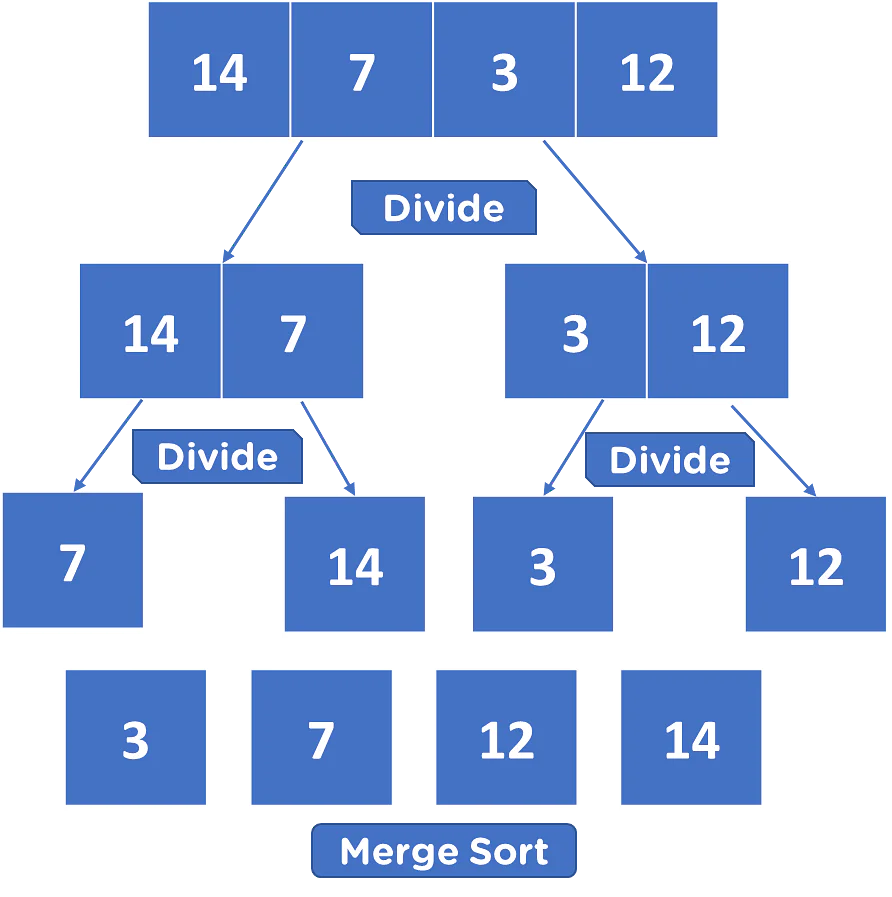

Como se muestra en la imagen, se recibe como entrada el arreglo de 4 elementos: 

\begin{equation} a = [14,7,3,12]\end{equation} 

Luego, se divide en 2 sub-arreglos, con $n/2$ elementos:

\begin{equation} a_1 = [14,7] ; a_2 = [3,12] \end{equation}

Para poder ordenar los sub-arreglos, al ser recursivo, se utiliza nuevamente el algoritmo MergeSort. Esto implica que los sub-arreglos ingresados, nuevamente se divide en 2 sub-arreglos cada uno. La recursividad del MergeSort permite que esto ocurra hasta que en determinado momento, los sub-arreglos contengan solo un elemento.

Por lo que tendremos:
\begin{equation} a_1 = [14] ; a_2 = [7] ; a_3 = [3] ; a_4 = [12] \end{equation}

En cada llamada del algortimo, MergeSort se encarga de combinar ordenadamente las subsecuencias desde el nivel de mas abajo. Para que al combinar se obtenga el orden deseado, se va comparando los items de cada sub-secuencia y se posicionan ordenadamente  en la secuencia resultante.

\begin{equation} a'_1 = [7,14] ; a'_2 = [3,12] \end{equation}

Notar que, al combinar $a_1$ con $a_2$ resulta el arreglo $a'_1$ con los elementos ordenados. Finalmente, el algoritmo retorna el arreglo ordenado de menor a mayor.
\begin{equation} a' = [3,7,12,14] \end{equation}

## 3 Código

A continuación se presenta un pseudocódigo del algoritmo. Notar que el algoritmo MergeSort se implemento recursivamente y que se utiliza la funcion *merge*, la cual será explicada mas adelante.

In [128]:

def MergeSort(arr,verbose = False):
  global count
  if verbose == True:
    print("Arreglo ingresado en MergeSort:", arr)
    print()

  if len(arr) > 1:
    mid = len(arr)//2 # Elemento medio del arreglo
    left= arr[:mid] # Mitad izquierda del arreglo
    right= arr[mid:] # Mitad derecha del arreglo

    MergeSort(left) # Ordena la parte izquierda del arreglo
    MergeSort(right) # Ordena la parte derecha del arreglo

    if verbose == True:
      merge(arr,left, right, verbose ==True)
    else:
      merge(arr,left, right) # combina y ordena ambos arreglos
  
  return


ar = [1,5,2,7,10,12,30]
print("Input:",ar)
count=0
MergeSort(ar)
print("Output:",ar)
print("# Comparaciones:",count)



Input: [1, 5, 2, 7, 10, 12, 30]
Output: [1, 2, 5, 7, 10, 12, 30]
# Comparaciones: 20


#Función Merge

## 1. Descripción

Esta función es el corazón del algoritmo MergeSort. En pocas palabras, se encarga de combinar, ordenadamente, dos sub-arreglos ordenados.

La función *merge* recibe 3 parámetros importantes: arr, a y b. arr es el arreglo, mientras que a y b son los sub-arreglos. Se asume que los sub-arreglos a y b se encuentran ordenados. La función los combina entregando un solo arreglo ordenado.

*Merge* implementado facilmente, funcionaria de la siguiente manera:



1.   Creamos un nuevo arreglo C para agregar los elementos ordenados.
2.   Comparamos el primer elementos de los sub-arreglos a y b, colocando el menor de ellos en el arreglo C. Y se elimina el elemento del sub-arreglo correspondiente.
3.   Se repite el paso anterior hasta que uno de los sub-arreglos quede vacío.
4. Agregamos los elementos restantes del otro sub-arreglo directamente en C.
5. Y finalmente se copia el contenido de C en el arreglo arr.

En este caso, la función merge se implemento cambiando directamente el arreglo ingresado, sin el uso de un arreglo temporal. En el siguiente ejemplo se ahondará en la explicacion procedimental y su relación con el código expuesto más adelante.

  




## 2. Ejemplo


Para la ejemplificación de la función *merge* consideraremos estar dentro del procedimiento de *MergeSort* y estaremos en el último ordenamiento.

Suponiendo que el arreglo inicial es:
$Arr = [2,5,6,7,3]$

Y los sub-arreglos a ordenar son:
$a=[2,5]$  y  $b=[3,6,7]$

Se inicia definiendo los 3 contadores $i$, $j$ y $k$ inicializados en 0, relacionados al sub-arreglo a, sub-arreglo b y Arr, respectivamente.

Luego se procede a comparar los elementos. En la primera iteracion se compara: $a[i] < b[j]$, como se inician en 0, corresponderia a $2<3$. Al ser cierto, entonces $Arr[k] = a[i]$ y aumenta $i$ y $k$. 

Esto implica que: $Arr = [2,5,6,7,3]$

Para la siguiente iteracion, se compara si $5 < 3$. Como es falso, entonces $Arr[k] = b[j]$ y aumenta $j$ y $k$.

Entonces, $Arr = [2,3,6,7,3]$ 

Es importante explicar, que los datos de $Arr$ no se pierden, ya que estan almacenados en los sub-arreglos y esta información no se borra, solo se reescribe.


Continuando, se tiene que: 
$5<6$, al ser cierto se posiciona el numero menor en $Arr$ y se quiebra el ciclo, ya que, el sub-arreglo $a$ se recorrió completamente.

$Arr = [2,3,5,7,3]$

$b=[6,7]$

Como habrán notado, aún quedan elementos por ordenar, por lo que la funcion entra a evaluar cual de los sub-arreglos ya fue recorrido. En este caso, fue $a$, por tanto *merge* ordenará los elementos sobrantes de $b$.

$Arr = [2,3,5,6,3]$  y $b=[7]$ 

Luego:

$Arr = [2,3,5,6,7]$

Notar que los elementos restantes de $b$, sólo se ingresaron sin verificar si eran menores o mayores, esto ocurre porque como se mencionó antes, se asume que los sub-arreglos ingresados ya se encuentran ordenados.





##3. Codigo

In [108]:
def merge(arr,a,b, verbose = False):
  global count
  i=j=k=0
  if verbose == True:
    print("Ingreso en función merge")
    print("-"*20)
    print()
    print("Arreglo a ordenar:",arr)
    print("sub-arreglo izquierdo:",a)
    print("sub-arreglo derecho:",b)
    print("i =",i,"j =",j,"k =",k)

  

  while i < len(a) and j < len(b):
    # cuando i o j sean mayores que el largo de los sub-arreglos
    # el ciclo se quiebra
    if verbose == True:
      print()
      print("Comparando:",a[i],"y",b[j])

    if a[i] < b[j]:
      count+=1
      # Intercambia el valor de arr por el correspondiente en a
      arr[k] = a[i]
      if verbose==True:
        print(a[i],"es menor")
        print("arr[",k,"] = ",a[i])

        if k==0:
          print("=> arreglo:",colored(f"{str(arr[k])}","red"),",",str(arr[k+1:])) 
        else:
          print("=> arreglo:",str(arr[:k])[1:-1],",",colored(f"{str(arr[k])}", "red"),",",str(arr[k+1:])[1:-1])
      i += 1

    else:
      count+=1
      # Intercambia el valor de arr por el correspondiente en b
      arr[k] = b[j]
      if verbose==True:
        print(b[j],"es menor")
        print("arr[",k,"] = ",b[j])
        if k==0:
          print("=> arreglo:",colored(f"{str(arr[k])}","red"),",",str(arr[k+1:])) 
        else:
          print("=> arreglo:",str(arr[:k])[1:-1],",",colored(f"{str(arr[k])}", "red"),",",str(arr[k+1:])[1:-1])
      j += 1

    k += 1

  if i >= len(a) and verbose == True:
    print()
    print("El sub-arreglo a ya fue recorrido, por tanto se rellena con:")

  if j >= len(b) and verbose == True:
    print()
    print("El sub-arreglo b ya fue recorrido, por tanto se rellena con:")
 
  # Checkea si queda algun elemento en los sub-arreglos
  while i < len(a):
    count+=1
    if verbose== True:
      print("arr[",k,"] = ", a[i])
    arr[k] = a[i]
    i += 1
    k += 1
 
  while j < len(b):
    count+=1
    if verbose== True:
      print("arr[",k,"] = ", b[j])
    arr[k] = b[j]
    j += 1
    k += 1


  return arr

# Ejecución del algoritmo paso a paso (verbose == True)

Al utilizar la opcion *verbose = True*, se puede apreciar el procedimiento del algoritmo, paso a paso.

In [111]:
import random

A = random.sample(range(1, 100), 12)
print("Input:",A)
MergeSort(A,True)
print("Output:",A)



Input: [72, 50, 81, 30, 41, 53, 13, 94, 75, 55, 46, 82]
Arreglo ingresado en MergeSort: [72, 50, 81, 30, 41, 53, 13, 94, 75, 55, 46, 82]

Ingreso en función merge
--------------------

Arreglo a ordenar: [72, 50, 81, 30, 41, 53, 13, 94, 75, 55, 46, 82]
sub-arreglo izquierdo: [30, 41, 50, 53, 72, 81]
sub-arreglo derecho: [13, 46, 55, 75, 82, 94]
i = 0 j = 0 k = 0

Comparando: 30 y 13
13 es menor
arr[ 0 ] =  13
=> arreglo: 13 , [50, 81, 30, 41, 53, 13, 94, 75, 55, 46, 82]

Comparando: 30 y 46
30 es menor
arr[ 1 ] =  30
=> arreglo: 13 , 30 , 81, 30, 41, 53, 13, 94, 75, 55, 46, 82

Comparando: 41 y 46
41 es menor
arr[ 2 ] =  41
=> arreglo: 13, 30 , 41 , 30, 41, 53, 13, 94, 75, 55, 46, 82

Comparando: 50 y 46
46 es menor
arr[ 3 ] =  46
=> arreglo: 13, 30, 41 , 46 , 41, 53, 13, 94, 75, 55, 46, 82

Comparando: 50 y 55
50 es menor
arr[ 4 ] =  50
=> arreglo: 13, 30, 41, 46 , 50 , 53, 13, 94, 75, 55, 46, 82

Comparando: 53 y 55
53 es menor
arr[ 5 ] =  53
=> arreglo: 13, 30, 41, 46, 50 , 53 , 13,

# Correctitud

## Teorema 1 (Correctitud función Merge)

El algoritmo *merge* genera un arreglo: $[a_1',a_2',...,a_n']$, con los mismos elementos de los subarreglos de entrada ordenados de menor a mayor, es decir, $a_1'\leq a_2' \leq... \leq a_n'$.

### Propiedad invariante de bucle
> Al inicio de cada iteración el arreglo c ,generado en merge, contiene los elementos más pequeños de los sub-arreglos *Left* y *Right*, que corresponden a los sub-arreglos ingresados a *merge*.

### Inicialización
> En la primera iteración, en el arreglo $A[p...k]$, siendo $p$ y $k$ posiciones del arreglo, tenemos que $k=p$, por lo tanto, el sub-arreglo $A[p...k-1]$, está vacío.

### Mantención
>Suponiendo que *Left*$[i] \leq$ *Right*$[j]$, *Left*$[i]$ es el elemento más pequeño que aún no ha sido copiado devuelta en $A[p...k]$.

## Teorema 2 (Correctitud MergeSort)

El algoritmo MergeSort genera un arreglo: $[a_1',a_2',...,a_n']$, con los mismos elementos del arreglo de entrada ordenados de menor a mayor, es decir, $a_1'\leq a_2' \leq... \leq a_n'$.

### Prueba correctitud

Para probar la correctitud en algoritmos recursivos es conveniente utilizar inducción matemática.

> En **inducción matemática,** para probar una declaración $P(n)$, para todos los números naturales $n$, usualmente se  debe:

  >1. Probar $P(n)$ para un **caso base**, por ejemplo $P(1)$.
  >2. Probar que si $P(m)$ es cierto para $m<n$, entonces $P(n)$ también lo es.


Nuestra hipótesis $P(n)$ es que MergeSort, retorna un arreglo con la secuencia de $n$ elementos de entrada ordenados de menor a mayor. 

En el caso base, cuando $n=1$, MergeSort retorna el único elemento, por lo que se cumple $P(1)$.

Luego, debemos probar que si $P(m)$ es cierta para $m<n$, entonces también lo es $P(n)$. 

Para $n$ elementos, el algoritmo divide el arreglo en dos sub-arreglos de tamaños: $m=\lfloor \frac{n}{2}\rfloor$ y $m=\lceil \frac{n}{2}\rceil$ y las ordena utilizando *Mergesort*. Como el tamaño de los sub-arreglos es menor a $n$, asumimos que son ordenadas correctamente. 

Luego, los dos sub-arreglos son combinados con la función *Merge*. Según el Teorema 1, Merge retorna un arreglo ordenado con los mismos elementos de los subarreglos, por lo tanto MergeSort es correcto. $\Box$

## Teorema 3 (Tiempo de ejecución)

El algoritmo MergeSort tiene un tiempo de ejecución de $O(n \log n)$.

### Árbol de Recurrencia
Aplicando la función de recurrencia en el MergeSort, obtenemos:

\begin{equation}
T(n) = \begin{cases}
  O(1)  & n \text{ is small} \\
  2 T(n/2) + O(n) & \text{ otherwise}
\end{cases}
\end{equation}

Reemplazando las complejidades $O(1)$ por una constante $c$ y las complejidades $O(n)$ por el término $c \cdot n$.
\begin{equation}
T(n) = \begin{cases}
  c  & n \text{ is small} \\
  2 T(n/2) + c \cdot n & \text{ otherwise}
\end{cases}
\end{equation}

Luego, podemos crear un árbol de recursión para representar la recurrencia subdividiendo en cada paso $T(n)$ recursivamente en sus componentes, es decir: $T(n)=2T(n/2)+cn$.


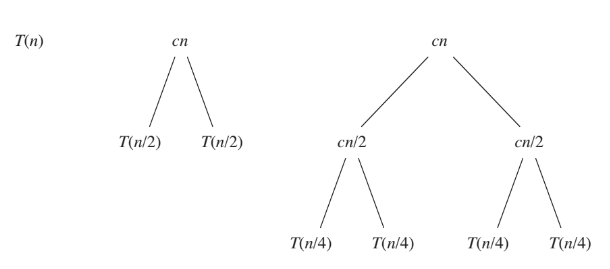

De esa forma, podemos obtener el árbol extendido completamente:

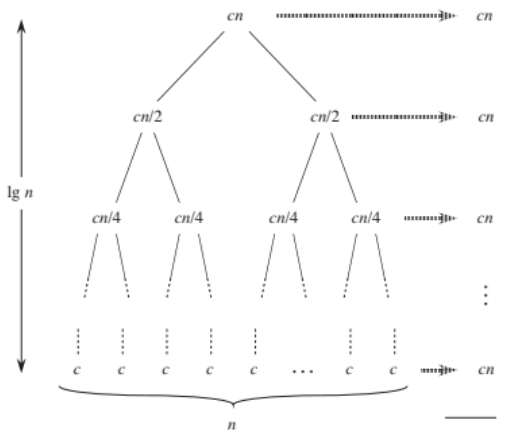


Realizando un análisis al árbol podemos evidenciar que la suma de tiempos de cada nivel es $cn$. 

Por otro lado, la altura del árbol es $\log_2 n$.

Finalmente, la suma total de tiempos de la recursión es: $cn \log_2 n \rightarrow O(n \log n)$

# Experimentos


## 1. MergeSort: Número de comparaciones (mejor caso v/s peor caso)

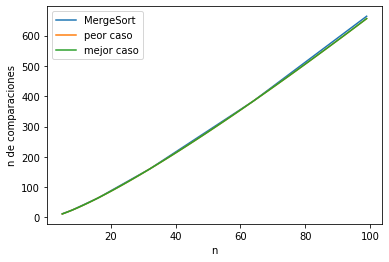

In [121]:
import math
import random 
import matplotlib.pyplot as plt


x = [n for n in range(5,100)]
y1=[n*math.log2(n) for n in range(5,100)] # peor caso
y2=[n*math.log2(n) for n in range(5,100)] # major caso
y = [];

for n in range(5,100):
  A=random.sample(range(1,100),n)
  count = 0
  MergeSort(A)
  y.append(count)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["MergeSort", "peor caso", "mejor caso"])

plt.xlabel("n")
plt.ylabel("n de comparaciones")

plt.show()




### Análisis de Resultado

Del gráfico podemos extraer que el caso experimental, con el mejor y peor caso son similares. De ello podemos conlcluir que el rendimiento del *MergeSort* no varía según el caso. O de otra forma, podemos decir, que el algoritmo *MergeSort* no tiene mejor ni peor caso, por tanto realiza el mismo número de comparaciones en todos los escenarios.

## 2.MergeSort v/s InsertionSort: Número de comparaciones

In [122]:
# funcion InsertionSort
from termcolor import colored

def InsertionSort(arreglo, verbose = False):
  n = len(arreglo)
  nVuelta = 0 # variable para indicar la pasada en la que esta
  sum = 0 # variable sumatoria de la cantidad de veces que retrocedio el algoritmo
  
  if verbose == True: print("input:",arreglo)

  for i in range(1,n):

    
    #orden indica si el array esta ordenado o no
    orden = True
    
    # variable auxiliar que contabiliza los retrocesos
    cont = 0

    key = arreglo[i]
    j = i-1

    #Para orden descendente, cambiar key < arreglo [j] por ">"
    while j >= 0 and key < arreglo[j]:

      if verbose == True:
        
        if cont == 0:
          nVuelta+=1
          print("\nvuelta nº",nVuelta)

        print(str(arreglo[:j+1])[1:-1],",",colored(f"{str(key)}", "red"),",",str(arreglo[j+2:])[1:-1])

      orden = False
      cont += 1
      arreglo[j+1] = arreglo [j]
      j = j-1
    
    arreglo[j+1] = key
    if j >= 0 : cont +=1

    if orden == False and verbose == True:
      print("\nAl terminar:")
      if i-cont == 0:
        # Esta condicion se agrego apra obtener un correcto formato de printeo
        print(colored(f"{str(key)}", "blue"),",", str(arreglo[j+2:])[1:-1])
      else:
        print(str(arreglo[:j+1])[1:-1],",", colored(f"{str(key)}", "blue"),",", str(arreglo[j+2:])[1:-1])
    

    sum += cont # acumula la cantidad de retrocesos que toma ordenar c/numero

  if verbose == True: 
    print("\nOutput:",arreglo)

  media = sum/n # calculo de la media de retrocesos

  return arreglo,media,sum

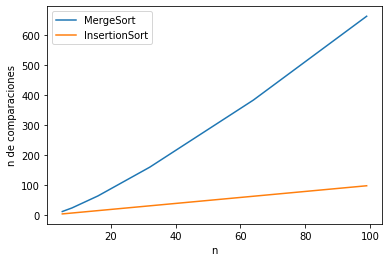

In [127]:


x = [n for n in range(5,100)]
y1=[];
y2=[];


for n in range(5,100):
  A=random.sample(range(1,100),n)
  count = 0
  MergeSort(A)
  a,m,c = InsertionSort(A)
  y1.append(count)
  y2.append(c)

plt.plot(x,y1)
plt.plot(x,y2)


plt.legend(["MergeSort","InsertionSort"])

plt.xlabel("n")
plt.ylabel("n de comparaciones")

plt.show()

### Análisis de Resultados

Del gráfico podemos concluir que, considerando, el numero de comparaciones que hace cada algoritmo, el *MergeSort* es mucho más eficiente que InsertionSort.

## 3. Tiempo de ejecucion: MergeSort v/s InsertionSort

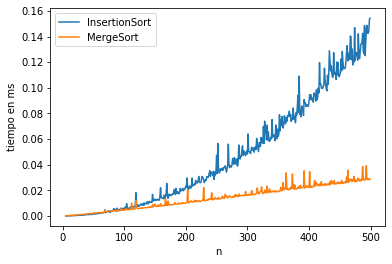

In [132]:
import datetime
from timeit import repeat

x = []
ym = []; # coordenada y MergeSort
yi = []; #coordenada y InsertionSort

for n in range(5,500):

  a = random.sample(range(1, 1000), n)

  tm = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({a})", repeat=1, number=10)
  ti = repeat(setup="from __main__ import InsertionSort", stmt=f"InsertionSort({a})", repeat=1, number=10)

  x.append(n)
  ym.append(tm)
  yi.append(ti)

plt.plot(x,yi)
plt.plot(x,ym)
plt.legend(["InsertionSort", "MergeSort"])

plt.xlabel('n')
plt.ylabel('tiempo en ms')
plt.show()

## Análisis de Resultados
Como era de esperarse, el *MergeSort* es considerablemente más rápido que *InsertionSort* en cuanto al tiempo de ejecución.

Resulta llamativo la cantidad de peaks que tienen las gráficas. Dicha fluctuación se puede asociar al procesador y considerando que el experimento se realizó a traves de la nube, resulta muy plausible que existan ese tipo de interferencias.

